In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:
# Load the dataset
data = pd.read_csv('extracted_features_500.csv')

# Separate features and labels
X = data.drop('class', axis=1).values
y = pd.get_dummies(data['class']).values  # One-hot encode labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for LSTM
# LSTM expects input shape to be (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [3]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\vishu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,855 (120.53 KB)

 Trainable params: 30,855 (120.53 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2385 - loss: 1.5939 - val_accuracy: 0.1900 - val_loss: 1.5518
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3318 - loss: 1.5030 - val_accuracy: 0.2100 - val_loss: 1.5116
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3338 - loss: 1.4260 - val_accuracy: 0.2100 - val_loss: 1.4726
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3836 - loss: 1.3924 - val_accuracy: 0.3200 - val_loss: 1.4318
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4484 - loss: 1.3185 - val_accuracy: 0.3600 - val_loss: 1.4399
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4793 - loss: 1.2492 - val_accuracy: 0.4300 - val_loss: 1.3794
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4823 - loss: 1.2426 - val_accuracy: 0.3900 - val_loss: 1.3739
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4592 - loss: 1.2331 - val_accuracy: 0.4000 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Mean Squared Error (MSE): 1.0600
Mean Absolute Error (MAE): 0.5800
Root Mean Squared Error (RMSE): 1.0296


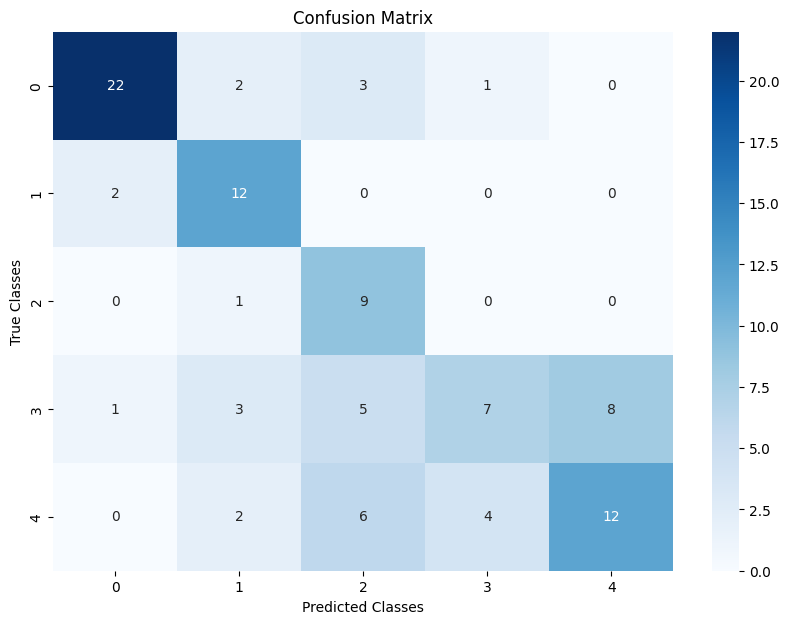

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.60      0.86      0.71        14
           2       0.39      0.90      0.55        10
           3       0.58      0.29      0.39        24
           4       0.60      0.50      0.55        24

    accuracy                           0.62       100
   macro avg       0.61      0.67      0.60       100
weighted avg       0.65      0.62      0.61       100



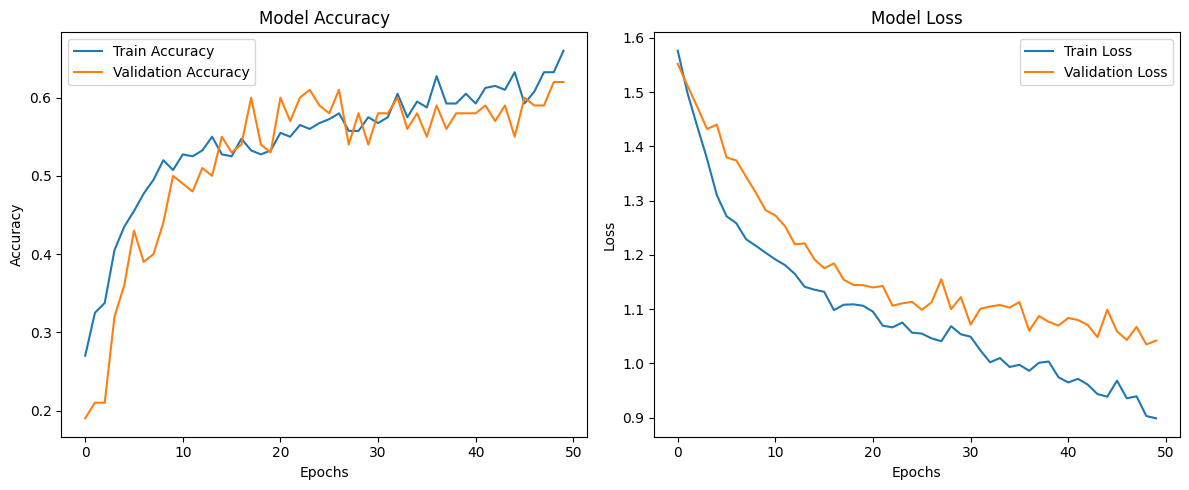

In [5]:
# Get predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(true_classes, predicted_classes)
mae = mean_absolute_error(true_classes, predicted_classes)
rmse = np.sqrt(mse)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(true_classes, predicted_classes))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test is your true labels (one-hot encoded) and y_pred contains predicted probabilities
# Convert predicted probabilities to class labels
predicted_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
true_classes = np.argmax(y_test, axis=1)       # True class indices

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_classes, predicted_classes)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(true_classes, predicted_classes)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 1.0600
Mean Absolute Error (MAE): 0.5800
Root Mean Squared Error (RMSE): 1.0296
